<center><img src="./images/logo_fmkn.png" width=300 style="display: inline-block;"></center> 

### Библиотеки для машинного обучения numpy, pandas

<br />
<br />
16 июня 2022

### [NumPy](https://docs.scipy.org/doc/numpy/user/index.html)
С 1995 numeric, с 2006 NumPy — «Numerical Python extensions» or «NumPy»

Возможности библиотеки NumPy:
* работать с многомерными массивами (таблицами), не отдельными числами
* быстро вычислять математические функций на многомерных массивах. Ядро пакета NumPy — объект [ndarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)
* старайтесь минимизировать количество индексаций в своем коде (особенно индексаций целым числом)
* если вы делаете цикл, обращаясь по очереди к каждому элементу массива, почти наверняка ваш код неэффективен и может быть значительно улучшен 

**Важные отличия** между NumPy arrays и Python sequences: 
* NumPy array имеет фиксированную длину, которая определяется в момент его создания (в отличие от Python lists, которые могут расти динамически)
* Элементы в NumPy array должны быть одного типа
* Можно выполнять операции непосредственно над NumPy arrays

**Скорость** NumPy из-за:
* Реализации на C
* Vectorization and Broadcasting (например, произведение массивов совместимых форм)

**Мотивирующий пример**
<center><img src="https://i.imgur.com/z4GzOX6.png" width=600 style="display: inline-block;"></center> 

## Способы создания Numpy arrays
* Конвертация из Python structures
* Генерация с помощью встроенных функций
* Чтение с диска


### Конвертация из Python structures

In [1]:
import numpy as np

In [2]:
np.array([1, 2, 3, 4, 5])

array([1, 2, 3, 4, 5])

При конвертации можно задавать тип данных с помощью аргумента [dtype](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dtype.html): 

In [3]:
np.array([1, 2, 3, 4, 5], dtype=np.float32)

array([1., 2., 3., 4., 5.], dtype=float32)

Аналогичное преобразование:

In [4]:
np.float32([1, 2, 3, 4, 5])

array([1., 2., 3., 4., 5.], dtype=float32)

### Генерация Numpy arrays

* [arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) — аналог range из Python, которому можно передать нецелочисленный шаг
* [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) — способ равномерно разбить отрезок на `n-1` интервал
* [logspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html) — способ разбить отрезок по логарифмической шкале
* [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) — создаёт массив, заполненный нулями заданной размерности
* [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) — создаёт массив, заполненный единицами заданной размерности
* [empty](https://docs.scipy.org/doc/numpy/reference/generated/numpy.empty.html) — создаёт массив неинициализированный никаким значением заданной размерности

In [5]:
np.arange(0, 5, 2)

array([0, 2, 4])

In [6]:
np.linspace(0, 5, 11)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [7]:
np.logspace(0, 9, 10, base=2)

array([  1.,   2.,   4.,   8.,  16.,  32.,  64., 128., 256., 512.])

In [8]:
np.zeros((2, 2, 3))

array([[[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]]])

In [9]:
np.ones((2, 2))

array([[1., 1.],
       [1., 1.]])

In [10]:
np.empty((2, 2))

array([[1., 1.],
       [1., 1.]])

In [11]:
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

Pазмеры массива хранятся в поле **shape**, а количество размерностей — в **ndim**

In [12]:
arr = np.ones((2, 3))
print(f"Размерность массива — {arr.shape}, количество размерностей — {arr.ndim}")

Размерность массива — (2, 3), количество размерностей — 2


Метод [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) позволяет преобразовать размеры массива без изменения данных, но возможно с копированием

In [13]:
array = np.arange(0, 6)
array = array.reshape((2, 3))
array

array([[0, 1, 2],
       [3, 4, 5]])

In [15]:
a = np.zeros((10, 2))

# A transpose makes the array non-contiguous
b = a.T

# Taking a view makes it possible to modify the shape 
# without modifying the initial object.
c = b.view()

c.shape = (4, 5) # but a.shape is changeable

AttributeError: Incompatible shape for in-place modification. Use `.reshape()` to make a copy with the desired shape.

In [16]:
a

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [17]:
a.shape = (20)
a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

Для того чтобы развернуть многомерный массив в вектор, можно воспользоваться функцией [ravel](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html) (эквивалентна `reshape(-1, order=order)`)

In [18]:
array = np.ravel(array)
array

array([0, 1, 2, 3, 4, 5])

### Индексация

В NumPy работает привычная индексация Python, включая использование отрицательных индексов и срезов

In [19]:
print(array)
print(array[0])
print(array[-1])
print(array[1:-1])
print(array[1:-1:2])
print(array[::-1])

[0 1 2 3 4 5]
0
5
[1 2 3 4]
[1 3]
[5 4 3 2 1 0]


<div class="alert alert-info">
<b>Замечание:</b> Индексы и срезы в многомерных массивах не нужно разделять квадратными скобками, 
т.е. вместо <b>matrix[i][j]</b> нужно использовать <b>matrix[i, j]</b>
</div>

<div class="alert alert-danger">
<b>Замечание:</b> Срезы в NumPy создают view, а не копии, как в случае срезов встроенных последовательностей Python (string, tuple and list). 
</div>

В качестве индексов можно использовать списки

In [20]:
array = np.zeros((2,3))
print(array)
array[((0,0), (0,1))]

[[0. 0. 0.]
 [0. 0. 0.]]


array([0., 0.])

In [21]:
print(np.array([[True, False, True], [True, False, True]]))
array[np.array([[True, False, True], [True, False, True]])]

[[ True False  True]
 [ True False  True]]


array([0., 0., 0., 0.])

<div class="alert alert-danger">
<b>Замечание:</b> Индексирование с помощью массива или маски создает новый массив (копию), а не view на старые данные. 
</div>

Сравнение многомерных массивов — сначала форма, потом содержимое

In [22]:
x = np.array([[1, 2, 3]])
y = np.array([1, 2, 3])

print(x.shape, y.shape)
print(np.array_equal(x, y))
print(np.array_equal(x, y[np.newaxis, :]))

(1, 3) (3,)
False
True


In [23]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
x % 2

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [25]:
x[(x % 2 == 0) & (x > 5)]

array([6, 8])

In [26]:
print(x)
x[x > 3] *= 2
print(x)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  2  3  8 10 12 14 16 18]


Для копирования в numpy есть метод copy

In [27]:
x.copy()

array([ 0,  1,  2,  3,  8, 10, 12, 14, 16, 18])

Операции в NumPy можно производить непосредственно над векторами одинаковой размерности без использования циклов

Например, вычисление поэлементной разности между векторами выглядит следующим образом:

In [28]:
_l = np.ones(5)
x = np.linspace(1, 5, 5)
print(x - _l)
print(x - 2 * _l)

[0. 1. 2. 3. 4.]
[-1.  0.  1.  2.  3.]


Аналогчино для многомерных массивов.

**Замечание:** Все арифметические операции над массивами одинаковой размерности производятся поэлементно

### [Broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)

Broadcasting снимает правило одной размерности и позволяет производить арифметические операции над массивами разных, но всё-таки согласованных размерностей. Простейшим примером является умножение вектора на число

![Imgur](https://i.imgur.com/tE3ZCWG.gif)

In [35]:
2 * np.arange(1, 4)

array([2, 4, 6])

Правило согласования размерностей выражается в одном предложении: 

```Для броадкастинга размерности по осям в двух массивах должен быть либо одинаковым, либо один из них должен быть равен единице.```

Если количество размерностей не совпадают, то к массиву меньшей размерности добавляются фиктивные размерности «слева», например

In [36]:
a  = np.ones((2, 3, 4))
b = np.arange(1, 5) # b.shape = (4,)
c = a * b # here a.shape = (2, 3, 4) and b.shape is considered to be (1, 1, 4)
c

array([[[1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.]],

       [[1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.]]])

Прибавим к каждой строчке матрицы один и тот же вектор

In [37]:
np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20], [30, 30, 30]]) + np.arange(3)

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

![Imgur](https://i.imgur.com/VsP2dqT.gif)

Теперь если мы хотим, проделать тот же трюк но со столбцами, то мы не можем просто добавить вектор состоящий из 4 элементов т.к. в данном случае размеры будут не согласованы

![Imgur](https://i.imgur.com/9LvGoeL.gif)

Сначала нужно преобразовать вектор к виду

In [38]:
np.arange(4)[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3]])

А затем к нему добавить матрицу:

In [39]:
np.arange(4)[:, np.newaxis] + np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20], [30, 30, 30]])

array([[ 0,  0,  0],
       [11, 11, 11],
       [22, 22, 22],
       [33, 33, 33]])

Если нужно перемножить многомерные массивы не поэлеметно, а по правилу перемножения матриц, то следует воспользоваться [np.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html), или оператором `@`

Транспонирование производится с помощью array**.T** или np.transpose

Так же в NumPy реализованно много полезных операций для работы с массивами: [np.min](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.min.html), [np.max](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.max.html), [np.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html), [np.mean](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html) и т.д.

**Замечание:** В каждой из перечисленных функций есть параметр **axis**, который указывает по какому измерению производить данную операцию. По умолчанию операция производится по всем значениям массива.

### Операции

In [40]:
x = np.arange(40).reshape(5, 2, 4)
print(x)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]]

 [[24 25 26 27]
  [28 29 30 31]]

 [[32 33 34 35]
  [36 37 38 39]]]


In [41]:
print(x.T.shape)
x.T

(4, 2, 5)


array([[[ 0,  8, 16, 24, 32],
        [ 4, 12, 20, 28, 36]],

       [[ 1,  9, 17, 25, 33],
        [ 5, 13, 21, 29, 37]],

       [[ 2, 10, 18, 26, 34],
        [ 6, 14, 22, 30, 38]],

       [[ 3, 11, 19, 27, 35],
        [ 7, 15, 23, 31, 39]]])

In [42]:
print(x.mean())
print(np.mean(x))

19.5
19.5


In [43]:
x_mean_0 = x.mean(axis=0)
print(x_mean_0.shape)
print(x_mean_0)

(2, 4)
[[16. 17. 18. 19.]
 [20. 21. 22. 23.]]


In [44]:
x_mean_1 = x.mean(axis=1)
print(x_mean_1.shape)
print(x_mean_1)

(5, 4)
[[ 2.  3.  4.  5.]
 [10. 11. 12. 13.]
 [18. 19. 20. 21.]
 [26. 27. 28. 29.]
 [34. 35. 36. 37.]]


In [45]:
x_mean_02 = x.mean(axis=(0, 2))
print(x_mean_02.shape)
print(x_mean_02)

(2,)
[17.5 21.5]


In [46]:
x.mean(axis=(0,1,2)), x.mean()

(19.5, 19.5)

### Конкатенация многомерных массивов

Конкатенировать несколько массивов можно с помощью функций **np.concatenate, np.vstack, np.hstack, np.dstack**

In [47]:
x = np.arange(10).reshape(5, 2)
y = np.arange(100, 120).reshape(5, 4)

In [48]:
x

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [49]:
y

array([[100, 101, 102, 103],
       [104, 105, 106, 107],
       [108, 109, 110, 111],
       [112, 113, 114, 115],
       [116, 117, 118, 119]])

In [50]:
np.hstack((x, y))

array([[  0,   1, 100, 101, 102, 103],
       [  2,   3, 104, 105, 106, 107],
       [  4,   5, 108, 109, 110, 111],
       [  6,   7, 112, 113, 114, 115],
       [  8,   9, 116, 117, 118, 119]])

In [51]:
p = np.arange(1).reshape([1, 1, 1, 1])
p

array([[[[0]]]])

In [52]:
print("vstack: ", np.vstack((p, p)).shape)
print("hstack: ", np.hstack((p, p)).shape)
print("dstack: ", np.dstack((p, p)).shape)

vstack:  (2, 1, 1, 1)
hstack:  (1, 2, 1, 1)
dstack:  (1, 1, 2, 1)


In [53]:
np.concatenate((p, p), axis=3).shape

(1, 1, 1, 2)

### Типы в NumPy

In [54]:
x = [1, 2, 70000]

In [55]:
np.array(x, dtype=np.float64)

array([1.e+00, 2.e+00, 7.e+04])

In [56]:
np.array(x, dtype=np.uint16)

array([   1,    2, 4464], dtype=uint16)

In [57]:
np.array(x, dtype=np.unicode_)

array(['1', '2', '70000'], dtype='<U5')

### Векторизация функции

In [58]:
def f(value):
    return np.sqrt(value)

vf = np.vectorize(f)
#  like the python map function, except it uses the broadcasting rules of numpy

In [59]:
vf(np.arange(10))

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

### Линейная алгебра

Документацию numpy.linalg можно посмотреть тут: https://numpy.org/doc/stable/reference/routines.linalg.html

In [60]:
v1 = np.array([1.0, 1.0, 2.0])
v2 = np.array([0.0, 1.0, -1.0])
np.inner(v1, v2)

-1.0

In [61]:
M = np.array([[2.0, 0.0, 0.0],
              [0.0, 0.0, 1.0],
              [0.0, 1.0, 0.0]])
print(M.shape, v1.shape)
print(np.dot(M, v1))

(3, 3) (3,)
[2. 2. 1.]


## [Pandas](https://pythonspot.com/category/pandas/)

Подключаем библиотеку Pandas (от panel data), предназначенную для считывания, предобработки и быстрой визуализации структурированных данных, а также для простой аналитики.

Даже когда только два массива есть (например, группировка по одному, а вычисления по второму), уже лучше Pandas. В названиях столбцов правильно отражать физический смысл, индекс (обозначения строк) тоже не обязательно числовой.

In [62]:
import pandas as pd
df = pd.read_csv("titanic.csv", sep="\t")
# and also pd.read_csv, pd.read_excel, pd.read_hdf5

In [63]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,126.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,14.613880,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,19.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


In [65]:
df[["Sex", "Cabin"]].describe()

,Sex,Cabin
count,156,31
unique,2,28
top,male,C23 C25 C27
freq,100,2


### Срезы в DataFrame

#### Индексация

In [66]:
df.sort_values("Age", inplace=True)

In [67]:
df.iloc[78] # integer-location — просто строчка по порядку от 0 до length-1

PassengerId                                                   54
Survived                                                       1
Pclass                                                         2
Name           Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...
Sex                                                       female
Age                                                         29.0
SibSp                                                          1
Parch                                                          0
Ticket                                                      2926
Fare                                                        26.0
Cabin                                                        NaN
Embarked                                                       S
Name: 53, dtype: object

In [68]:
df.loc[78] # index 78

PassengerId                               79
Survived                                   1
Pclass                                     2
Name           Caldwell, Master. Alden Gates
Sex                                     male
Age                                     0.83
SibSp                                      0
Parch                                      2
Ticket                                248738
Fare                                    29.0
Cabin                                    NaN
Embarked                                   S
Name: 78, dtype: object

In [69]:
df.loc[[78, 79, 100], ["Age", "Name"]]

,Age,Name
78,0.83,"Caldwell, Master. Alden Gates"
79,30.00,"Dowdell, Miss. Elizabeth"
100,28.00,"Petranec, Miss. Matilda"


<div class="alert alert-danger">
<b>Замечание:</b> Если хотите модифицировать данные среза, не меняя основной таблицы, нужно сделать копию.
</div>

In [70]:
df_slice_copy = df.loc[[78, 79, 100], ["Age", "Name"]].copy()

In [71]:
df_slice_copy["Age"] = 3

In [72]:
df_slice_copy

,Age,Name
78,3,"Caldwell, Master. Alden Gates"
79,3,"Dowdell, Miss. Elizabeth"
100,3,"Petranec, Miss. Matilda"


<div class="alert alert-danger">
<b>Замечание:</b> Если хотите менять основную таблицу, то используйте <b>loc/iloc</b>
</div>

In [73]:
some_slice = df["Age"].isin([20, 25, 30])
df.loc[some_slice, "Fare"] = df.loc[some_slice, "Fare"] * 1000

Так лучше не делать:

In [74]:
slice_df = df[some_slice]
slice_df["Fare"] = slice_df["Fare"] * 10

/tmp/ipykernel_7957/1355601167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slice_df["Fare"] = slice_df["Fare"] * 10


Получить значения только нужных столбцов можно передав в ```[]``` название столбца (или список названий столбцов).

**Замечание:** Если передаём название одного столбца, то получаем объект класса [pandas.Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html), а если список названий столбцов, то получаем  [pandas.DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), чтобы получить [numpy.array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) обратитесь к полю **values**.

У Series и DataFrame много общих методов

In [75]:
# pandas.Series
df["Age"].head(5)

78     0.83
119    2.00
7      2.00
16     2.00
43     3.00
Name: Age, dtype: float64

In [76]:
# pandas.DataFrame
df[["Age"]].head(5)

,Age
78,0.83
119,2.00
7,2.00
16,2.00
43,3.00


### pd.Series

Одномерные срезы датафреймов имеют тип pd.Series.

Можно получить np.array из pd.Series (но вы не хотите этого делать :).

In [77]:
df["Age"].head(5).values

array([0.83, 2.  , 2.  , 2.  , 3.  ])

Можно достать и индекс

In [78]:
df["Age"].head(5).index

Int64Index([78, 119, 7, 16, 43], dtype='int64')

Создаются они примерно так же, как np.array. Опционально указывается индекс

In [79]:
pd.Series([1, 2, 3], index=["Red", "Green", "Blue"])

Red      1
Green    2
Blue     3
dtype: int64

In [80]:
pd.Series(1, index=["Red", "Green", "Blue"])

Red      1
Green    1
Blue     1
dtype: int64

Series можно перевести в DataFrame

In [81]:
s = pd.Series([1, 2, 3], index=["Red", "Green", "Blue"])
s.to_frame("Values")

,Values
Red,1
Green,2
Blue,3


In [82]:
s.loc["Red"]

1

In [83]:
s.iloc[0]

1

### [Объединение таблиц](http://pandas.pydata.org/pandas-docs/stable/merging.html)

In [84]:
df1 = df[["Age", "Parch"]].copy()
df2 = df[["Ticket", "Fare"]].copy()

In [85]:
# by index
df1.join(df2).head(5)

,Age,Parch,Ticket,Fare
78,0.83,2,248738,29.0000
119,2.00,2,347082,31.2750
7,2.00,1,349909,21.0750
16,2.00,1,382652,29.1250
43,3.00,2,SC/Paris 2123,41.5792


In [86]:
df1 = df[["Age", "Parch", "PassengerId"]].copy()
df2 = df[["Ticket", "Fare", "PassengerId"]].copy()

In [87]:
# by columns
pd.merge(df1, df2, on=["PassengerId"]).head(5)

,Age,Parch,PassengerId,Ticket,Fare
0,0.83,2,79,248738,29.0000
1,2.00,2,120,347082,31.2750
2,2.00,1,8,349909,21.0750
3,2.00,1,17,382652,29.1250
4,3.00,2,44,SC/Paris 2123,41.5792


In [88]:
pd.merge(df1, df2, on=["PassengerId"], how="inner").head(5)

,Age,Parch,PassengerId,Ticket,Fare
0,0.83,2,79,248738,29.0000
1,2.00,2,120,347082,31.2750
2,2.00,1,8,349909,21.0750
3,2.00,1,17,382652,29.1250
4,3.00,2,44,SC/Paris 2123,41.5792


### Группировка

In [89]:
print("Pclass 1: ", df[df["Pclass"] == 1]["Age"].mean())
print("Pclass 2: ", df[df["Pclass"] == 2]["Age"].mean())
print("Pclass 3: ", df[df["Pclass"] == 3]["Age"].mean())

Pclass 1:  38.111111111111114
Pclass 2:  28.114827586206893
Pclass 3:  24.307142857142857


In [90]:
df.groupby(["Pclass"])[["Age"]].mean()

,Age
Pclass,
1,38.111111
2,28.114828
3,24.307143


In [91]:
df.groupby(["Survived", "Pclass"])

In [92]:
df.groupby(["Survived", "Pclass"])["PassengerId"].count()

Survived  Pclass
0         1         18
          2         16
          3         68
1         1         12
          2         14
          3         28
Name: PassengerId, dtype: int64

In [93]:
df.groupby(["Survived", "Pclass"])[["PassengerId", "Cabin"]].count()

PassengerId  Cabin
Survived Pclass                    
0        1                18     12
         2                16      1
         3                68      1
1        1                12     12
         2                14      3
         3                28      2

In [94]:
df.groupby(["Survived", "Pclass"])[["PassengerId"]].describe()

PassengerId                                             \
                      count        mean        std   min    25%    50%   
Survived Pclass                                                          
0        1             18.0   82.555556  44.501450   7.0  40.75   88.5   
         2             16.0  107.187500  44.842270  21.0  72.50  122.0   
         3             68.0   80.161765  43.375352   1.0  46.75   84.0   
1        1             12.0   60.083333  50.118874   2.0  21.00   54.5   
         2             14.0   62.000000  39.240874  10.0  27.50   58.0   
         3             28.0   71.607143  45.525198   3.0  32.00   72.0   

                                
                    75%    max  
Survived Pclass                 
0        1       117.00  156.0  
         2       145.25  151.0  
         3       114.25  155.0  
1        1        91.25  152.0  
         2        83.50  134.0  
         3       108.50  147.0

### Работа с timestamp'ами

In [95]:
tdf = df.copy()
tdf["ts"] = range(1560000000, 1560000000 + tdf.shape[0])

In [96]:
tdf.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ts
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.000,NaN,S,1560000000
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.275,NaN,S,1560000001


In [97]:
tdf["ts"] = pd.to_datetime(tdf["ts"], unit="s")

In [98]:
tdf.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ts
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.000,NaN,S,2019-06-08 13:20:00
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.275,NaN,S,2019-06-08 13:20:01


In [99]:
tdf.set_index("ts", inplace=True)

In [100]:
# для сглаживания
tdf.resample("15s").sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
ts,,,,,,,
2019-06-08 13:20:00,837,6,41,97.83,33,19,415.6084
2019-06-08 13:20:15,1117,5,41,253.50,18,9,483.4376
2019-06-08 13:20:30,1445,3,37,305.00,4,4,33115.1958
2019-06-08 13:20:45,1569,6,34,346.00,6,4,8455.0458
2019-06-08 13:21:00,1116,5,36,407.50,7,4,13305.3374
2019-06-08 13:21:15,1324,8,38,468.00,7,1,12733.5166
2019-06-08 13:21:30,829,5,31,554.50,9,12,472.2124
2019-06-08 13:21:45,1531,2,26,724.00,5,4,601.4584
2019-06-08 13:22:00,642,7,35,389.50,1,1,361.8667


In [101]:
tdf.resample("1T").sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
ts,,,,,,,
2019-06-08 13:20:00,4968,20,153,1002.33,61,36,42469.2876
2019-06-08 13:21:00,4800,20,131,2154.00,28,21,27112.5248
2019-06-08 13:22:00,2478,14,94,389.50,7,5,641.5790


### Rolling функции

In [102]:
tdf.sort_index(inplace=True)

In [103]:
tdf[["Fare"]].rolling(window=5).mean().head(10)

,Fare
ts,
2019-06-08 13:20:00,NaN
2019-06-08 13:20:01,NaN
2019-06-08 13:20:02,NaN
2019-06-08 13:20:03,NaN
2019-06-08 13:20:04,30.41084
2019-06-08 13:20:05,30.19084
2019-06-08 13:20:06,27.27584
2019-06-08 13:20:07,28.61084
2019-06-08 13:20:08,30.72334


Удобно делать вместе с groupby

In [104]:
rol = tdf[["Sex", "Fare"]].groupby(["Sex"]).rolling(window=5).mean()

In [105]:
rol.head(6)

Fare
Sex    ts                           
female 2019-06-08 13:20:01       NaN
       2019-06-08 13:20:04       NaN
       2019-06-08 13:20:06       NaN
       2019-06-08 13:20:07       NaN
       2019-06-08 13:20:09  27.67584
       2019-06-08 13:20:10  28.29584

In [106]:
rol.loc[("male")].head(10)

,Fare
ts,
2019-06-08 13:20:00,NaN
2019-06-08 13:20:02,NaN
2019-06-08 13:20:03,NaN
2019-06-08 13:20:05,NaN
2019-06-08 13:20:08,29.35750
2019-06-08 13:20:11,32.93750
2019-06-08 13:20:12,30.97084
2019-06-08 13:20:18,26.98918
2019-06-08 13:20:19,28.28418


### Работа со строками

In [107]:
df["Name"].str.lower()\
          .str.replace(",", " ")\
          .str.split(".").str[1]\ # expand=True
          .head(10)

SyntaxError: unexpected character after line continuation character (3235598474.py, line 3)

### Работа с NaN'ами

In [108]:
df["Cabin"].head(15)

78     NaN
119    NaN
7      NaN
16     NaN
43     NaN
63     NaN
10      G6
58     NaN
50     NaN
24     NaN
147    NaN
59     NaN
125    NaN
9      NaN
14     NaN
Name: Cabin, dtype: object

In [109]:
df["Cabin"].dropna().head(15)

10              G6
27     C23 C25 C27
136            D47
102            D26
151             C2
88     C23 C25 C27
97         D10 D12
118        B58 B60
139            B86
75           F G73
23              A6
66             F33
123           E101
21             D56
3             C123
Name: Cabin, dtype: object

In [110]:
df["Cabin"].fillna(3).head(5)

78     3
119    3
7      3
16     3
43     3
Name: Cabin, dtype: object

In [111]:

df["Cabin"].fillna(method="backfill").head(15)

78              G6
119             G6
7               G6
16              G6
43              G6
63              G6
10              G6
58     C23 C25 C27
50     C23 C25 C27
24     C23 C25 C27
147    C23 C25 C27
59     C23 C25 C27
125    C23 C25 C27
9      C23 C25 C27
14     C23 C25 C27
Name: Cabin, dtype: object

In [112]:
pd.isna(df["Cabin"]).head(10)

78      True
119     True
7       True
16      True
43      True
63      True
10     False
58      True
50      True
24      True
Name: Cabin, dtype: bool

### Быстрая визуализация

<AxesSubplot:xlabel='ts'>

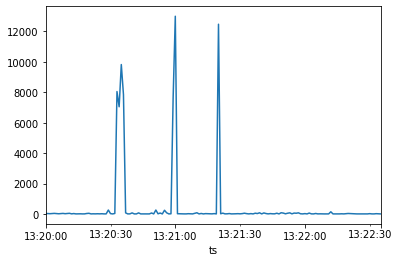

In [113]:
%matplotlib inline

tdf["Fare"].plot()

<AxesSubplot:xlabel='ts'>

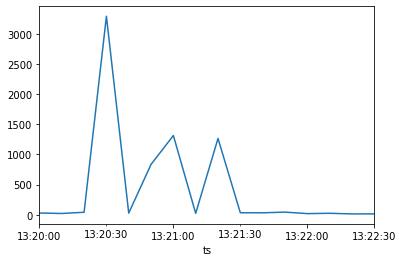

In [114]:
tdf["Fare"].resample("10s").mean().plot()

<AxesSubplot:>

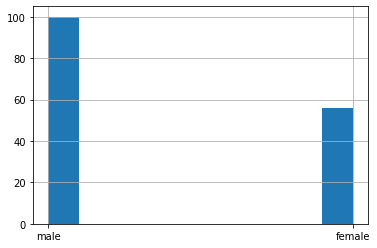

In [115]:
tdf["Sex"].hist()